In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Coal Consumption.csv')

In [ ]:
df.shape

(132, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          132 non-null    object 
 1   Amount         132 non-null    float64
 2   Extract_month  132 non-null    int64  
 3   Extract Year   132 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.2+ KB


In [ ]:
df.head()

,Month,Amount,Extract_month,Extract Year
0,1/1/1990,16.50,1,1990
1,2/1/1990,15.17,2,1990
2,3/1/1990,12.75,3,1990
3,4/1/1990,12.31,4,1990
4,5/1/1990,8.34,5,1990


In [ ]:
df = pd.read_csv("/content/Coal Consumption.csv", parse_dates=['Month'],
                                                               index_col = ['Month'])

In [ ]:
df.head()

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1990-01-01 to 2000-12-01
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Amount         132 non-null    float64
 1   Extract_month  132 non-null    int64  
 2   Extract Year   132 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.1 KB


# **Slice a data from June 1990 to March 1991**

In [ ]:
df.loc['1990-06':'1991-03']

,Amount,Extract_month,Extract Year
Month,,,
1990-06-01,8.63,6,1990
1990-07-01,12.37,7,1990
1990-08-01,11.53,8,1990
1990-09-01,9.47,9,1990
1990-10-01,9.57,10,1990
1990-11-01,14.44,11,1990
1990-12-01,24.50,12,1990
1991-01-01,19.94,1,1991
1991-02-01,13.99,2,1991


# **Check Missing Values**

In [ ]:
df.isnull().sum()

Amount           0
Extract_month    0
Extract Year     0
dtype: int64

In [ ]:
df.head()

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990


**.asfreq** = Returning data frame

MS = Month Start, M-Month end, Y-Year, YS- Year Start, QS-Quartile Start, Q,S,D,B

In [ ]:
df.asfreq('MS')

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990
...,...,...,...
2000-08-01,8.31,8,2000
2000-09-01,6.87,9,2000
2000-10-01,5.45,10,2000


In [ ]:
df.isnull().sum()

Amount           0
Extract_month    0
Extract Year     0
dtype: int64

# **Fill Missing values**
* Back Fill / bfill

value goes to previous time stamp

Ex. record of 25th is used to fill missing in 24th

* Front fill / pad

value goes to next time stamp

Ex. record of 25th is used to fill missing in 26th

In [ ]:
df.fillna(method='ffill', inplace=True)

# **Seasonal Decompose**

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(df['Amount'], model='multiplicative', extrapolate_trend='freq')


In [ ]:
# Additive Decomposition
result_add = seasonal_decompose(df['Amount'], model='additive', extrapolate_trend='freq')


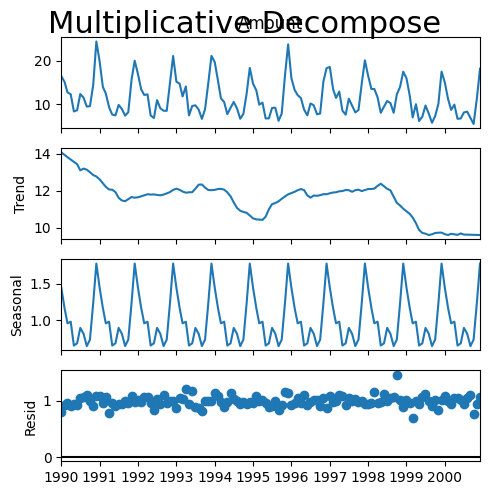

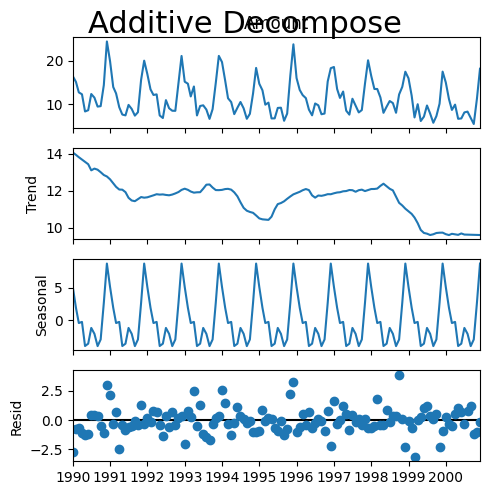

In [ ]:
# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.9 MB/s eta 0:00:00


In [ ]:
from pmdarima.model_selection import train_test_split

In [ ]:
X_train, X_test = train_test_split(df['Amount'], test_size=0.1)

In [ ]:
X_train.shape, X_test.shape

((118,), (14,))

In [ ]:
# Fit your model
import pmdarima as pm

In [ ]:
#SARIMA--> season
model = pm.auto_arima(X_train, seasonal=True, m=12,trace = True) #seasonal =False

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=481.098, Time=2.91 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=671.155, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=502.398, Time=0.47 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=563.785, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=929.799, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=561.377, Time=2.16 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.57 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=592.531, Time=0.31 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=535.351, Time=1.76 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.04 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=468.873, Time=1.13 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=559.850, T

In [ ]:
model = pm.auto_arima(X_train, seasonal = False, m=12,trace = True) #seasonal =False

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=929.799, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=633.660, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=807.250, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=631.671, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=622.426, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=622.759, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=629.971, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=622.466, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=593.537, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=591.582, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=612.514, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=593.501, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=596.994, Time

In [ ]:
# Create a Model

ar = pm.arima.ARIMA((2,0,0))
ar.fit(X_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(order=(2, 0, 0))

In [ ]:
pred = ar.predict(14)

In [ ]:
pred1 = ar.predict(X_test.shape[0])    # No. of rows in test data

In [ ]:
from pmdarima.metrics import smape
smape(X_test, pred)

32.57268640302829

In [ ]:
smape(X_test, pred1)

32.57268640302829